In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [72]:
# Read data

df = pd.read_csv(r"C:\Users\peter\OneDrive\Dokumenter\GitHub\ISDS2021_grp24\Exam\final data\final_data_endelig_endelig.csv")

column_indices = [0,2,3,4]
new_names = ['name','release_date','developer','price']
old_names = df.columns[column_indices]
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

df.head()

C:\Users\peter\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,name,age,release_date,developer,price,Arabic,Bulgarian,Chinese (Simplified),Chinese (Traditional),Czech,...,Well-Written,Hardware,8-bit Music,BMX,Steam Machine,Reboot,num_tags,id,time_delta,Shipped
0,BattleBeasts,0,2021-05-10,Oleg Shestoperov,4.99,0,0,0,0,0,...,0,0,0,0,0,0,17,830580.0,100,1
1,Soul Saga,0,2020-02-28,Disastercake,14.99,0,0,0,0,0,...,0,0,0,0,0,0,20,251590.0,537,1
2,Swamp Jump,0,2018-08-21,Bullid Games,1.99,0,0,0,0,0,...,0,0,0,0,0,0,2,914230.0,1093,1
3,Retro Snake,0,2018-06-20,"Flying potato bread, Wixl",1.99,0,0,0,0,0,...,0,0,0,0,0,0,3,877260.0,1155,0
4,Gold Digger Maze,0,2018-07-24,Bullid Games,3.99,0,0,0,0,0,...,0,0,0,0,0,0,3,893140.0,1121,1


In [73]:
df.shape

(9477, 466)

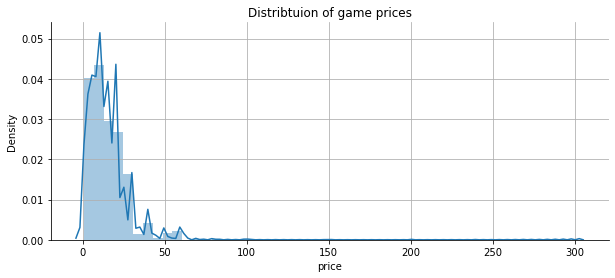

In [74]:
# Price distribution

fig, ax = plt.subplots(1,1, figsize=(10,4))

sns.distplot(df["price"], ax=ax)

plt.title("Distribtuion of game prices")
plt.ylabel("Density")
plt.grid(True)

sns.despine()

plt.savefig("Price_dist.png")


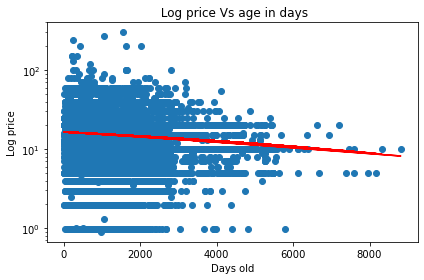

In [75]:
# Regplot of delta_time vs price


fig = plt.figure()
plt.yscale('log')
plt.title(' Log price Vs age in days')
plt.xlabel('Days old')
plt.ylabel('Log price')
plt.scatter(df['time_delta'], df['price'])
m, b = np.polyfit(df['time_delta'], df['price'], 1)
plt.plot(df['time_delta'], m*df['time_delta'] + b, color = 'red')
fig.tight_layout()

plt.savefig("timedelta_price_reg.png")

In [79]:
# Descritive table for price, time_delta, num_lang and num_tags



descriptive_table = df[["price", "time_delta", "num_lang", "num_tags", "Shipped"]].describe()

# Exporting to LaTeX
descriptive_table.to_latex('descriptive_table.tex')

# Exporting as image

import dataframe_image as dfi # remember to pip install 

dfi.export(descriptive_table, 'descriptive_table.png')

